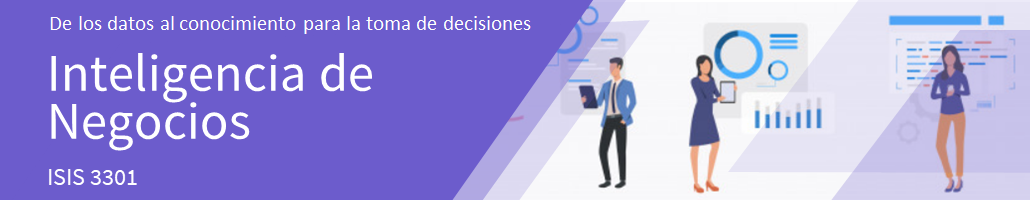

## Tarea de clasificación.

El objetivo de este notebook es mostrar cómo resolver una tarea de clasificación utilizando la librería scikit-learn. Tomaremos como caso de estudio los diagnósticos de SaludAlpes y veremos cómo realizar la preparación de los datos para el algoritmo de árboles de decisión KNN.

1. Preparar los datos para el modelado.
2. Crear un modelo de árbol de decisión.
3. Utilizar técnicas de validación para el ajuste de hiperparámetros propios de árboles de decisión.
4. Evaluar el modelo.
5. Interpretar el modelo con base en los objetivos de negocio.

### 1. Importación de librerías 

En las siguientes líneas de código se importan las librerías y herramientas necesarias para desarrollar el caso de uso.

In [1]:
# Librerías para manejo de datos
import pandas as pd
pd.set_option('display.max_columns', 25) # Número máximo de columnas a mostrar
pd.set_option('display.max_rows', 50) # Numero máximo de filas a mostar
import numpy as np
np.random.seed(3301)
import pandas as pd
# Para preparar los datos
from sklearn.preprocessing import LabelEncoder
# Para crear el arbol de decisión 
from sklearn.tree import DecisionTreeClassifier 
# Para usar KNN como clasificador
from sklearn.neighbors import KNeighborsClassifier
# Para realizar la separación del conjunto de aprendizaje en entrenamiento y test.
from sklearn.model_selection import train_test_split
# Para evaluar el modelo
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import plot_confusion_matrix
# Para búsqueda de hiperparámetros
from sklearn.model_selection import GridSearchCV
# Para la validación cruzada
from sklearn.model_selection import KFold 
#Librerías para la visualización
import matplotlib.pyplot as plt
# Seaborn
import seaborn as sns 
from sklearn import tree

### 2. Carga de los datos
A través de la librería **pandas** podemos realizar la carga de datos desde el archivo de SaludAlpes, el separador de este archivo csv es ';'.

In [2]:
# Se cargan los datos. 
df_diagnostico=pd.read_csv('202120_Laboratorio_1_datos_SaludAlpes_diagnosticos_dataset.csv', sep=';')

In [3]:
# Cantidad de datos y número de variables
df_diagnostico.shape

(768, 11)

In [4]:
# Mostrar los datos
df_diagnostico.head()

,Hair color,Pregnancies,Glucose,City,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,Red,6,148,New York,72,35,0,336,627,50,1
1,Black,1,85,New York,66,29,0,266,351,31,0
2,Red,8,183,New York,64,0,0,233,672,32,1
3,Black,1,89,New York,66,23,94,281,167,21,0
4,Black,0,137,New York,40,35,168,431,2288,33,1


In [5]:
# Podemos ver los tipos de todas la variables.
df_diagnostico.dtypes

Hair color                  object
Pregnancies                 object
Glucose                     object
City                        object
BloodPressure               object
SkinThickness               object
Insulin                     object
BMI                          int64
DiabetesPedigreeFunction    object
Age                          int64
Outcome                     object
dtype: object

Tanto Hair color como City son de tipo object al ser string, el resto son integer; sin embargo se detectan como object por una fila que no tiene los datos completos.

In [6]:
# Buscamos la fila que posee este error y se elimina
df_diagnostico.dtypes
df_diagnostico.loc[df_diagnostico['Pregnancies'] == '-']
df = df_diagnostico.drop(df_diagnostico.index[583])
df.shape

(767, 11)

In [7]:
# Hacemos una descripción de los datos una vez estos son transformados.
df['Pregnancies']=df['Pregnancies'].astype(int)
df['Glucose']=df['Glucose'].astype(int)
df['BloodPressure']=df['BloodPressure'].astype(int)
df['SkinThickness']=df['SkinThickness'].astype(int)
df['Insulin']=df['Insulin'].astype(int)
df['DiabetesPedigreeFunction']=df['DiabetesPedigreeFunction'].astype(int)
df['Outcome']=df['Outcome'].astype(int)
df.dtypes

Hair color                  object
Pregnancies                  int32
Glucose                      int32
City                        object
BloodPressure                int32
SkinThickness                int32
Insulin                      int32
BMI                          int64
DiabetesPedigreeFunction     int32
Age                          int64
Outcome                      int32
dtype: object

In [8]:
# Y hacer una descripción de los datos
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.839635,120.921773,69.096480,20.563233,79.903520,289.670143,432.395046,38.006519,0.349413
std,3.368429,31.984561,19.366833,15.945349,115.283105,116.780873,336.144934,117.902397,0.477096
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,251.500000,205.500000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,309.000000,337.000000,29.000000,0.000000
75%,6.000000,140.500000,80.000000,32.000000,127.500000,359.000000,592.000000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,671.000000,2329.000000,3256.000000,1.000000


In [9]:
# Se observa que hay ausencias para todas las variables:
df.isnull().sum()

Hair color                  0
Pregnancies                 0
Glucose                     0
City                        0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### 2. Limpieza y preparación de los datos

Primero vamos a ejecutar los pasos de limpieza de los datos.

In [10]:
# Es recomendable que todos los pasos de limpieza y preparación se realicen sobre otro archivo.
up_df = df

In [11]:
# Eliminación de registros duplicados.
up_df = up_df.drop_duplicates()
up_df.shape

(767, 11)

La cantidad de datos y columnas se mantiene igual ya que no hay valores duplicados ni ausencias.
Sin embargo, dentro de los datos se encuentran unos registros inconsistentes en BloodPressure y Glucose, los cuales tienen datos iguales a 0 cuando deberían ser mayores a este valor; al igual que edades fuera de lo posible.

In [12]:
up_df.loc[df['Age'] > 120]
df_diag_l = up_df.drop(index = [196, 208])

In [13]:
df_diag_l['Glucose']=df_diag_l['Glucose'].replace(0,df_diag_l['Glucose'].mean())
df_diag_l['BloodPressure']=df_diag_l['BloodPressure'].replace(0,df_diag_l['BloodPressure'].mean())
df_diag_l.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000
mean,3.847059,121.765851,72.279892,20.581699,79.998693,289.675817,432.903268,33.261438,0.350327
std,3.369696,30.465355,12.124132,15.947154,115.397373,116.911406,336.427137,11.762356,0.477384
min,0.000000,44.000000,24.000000,0.000000,0.000000,0.000000,1.000000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,0.000000,0.000000,252.000000,206.000000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,309.000000,338.000000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,128.000000,359.000000,593.000000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,671.000000,2329.000000,81.000000,1.000000


In [14]:
# Cantidad de datos y número de variables
df_diag_l.shape

(765, 11)

Se eliminan 2 datos con la edad inconsistente, mientras que aquellos datos que tienen Glucose o BloodPressure igual a 0 son reemplazados por la media de los datos.

Se analiza la variable objetivo "outcome" ya que es la que predice si tiene diabetes o no.

In [15]:
# Podemos ver los estadísticos de la variable "Outcome"
df_diag_l['Outcome'].describe()

count    765.000000
mean       0.350327
std        0.477384
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Outcome, dtype: float64

La descripción no sirve de mucho ya que es una variable entera pero con valores binarios que ya determinan el objetivo de la función, por lo tanto no hay que modificarla.

In [16]:
# Cantidad de datos de cada clase
pd.value_counts(df_diag_l['Outcome'])

0    497
1    268
Name: Outcome, dtype: int64

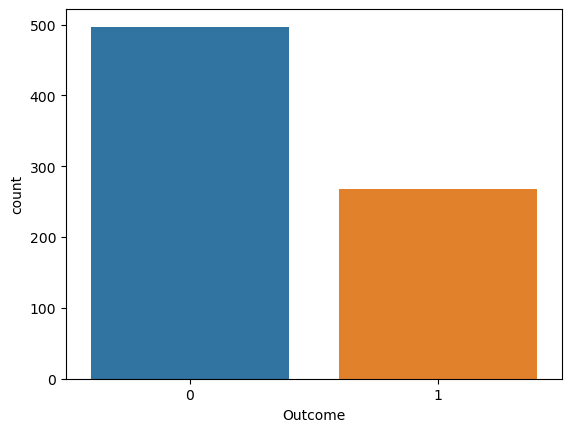

In [17]:
# También podemos vizualizar las proporciones con un diagrama de barras.
ax = sns.countplot(x='Outcome', data=df_diag_l)
plt.show()

Ahora mostramos los datos que tenemos:

In [18]:
df_diag_l.head()

,Hair color,Pregnancies,Glucose,City,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,Red,6,148.0,New York,72.0,35,0,336,627,50,1
1,Black,1,85.0,New York,66.0,29,0,266,351,31,0
2,Red,8,183.0,New York,64.0,0,0,233,672,32,1
3,Black,1,89.0,New York,66.0,23,94,281,167,21,0
4,Black,0,137.0,New York,40.0,35,168,431,2288,33,1


In [19]:
# Eliminaremos las variables que consideramos no son útiles para la tarea que queremos resolver, es decir:
# Hair color y City.
df_diag_limpio = df_diag_l.drop(['City', 'Hair color'], axis=1)
df_diag_limpio.dtypes

Pregnancies                   int32
Glucose                     float64
BloodPressure               float64
SkinThickness                 int32
Insulin                       int32
BMI                           int64
DiabetesPedigreeFunction      int32
Age                           int64
Outcome                       int32
dtype: object

Se eliminan estas variables ya que el color de cabello no afecta para la diabetes, y aunque la ciudad puede afectar, no se tienen los datos necesarios para complementar la información y determinar un impacto con solo el nombre.

Scikit-learn requiere que todos los atributos sean numéricos y que la variable objetivo, en una tarea de clasificación, esté codificada con números.

In [20]:
# Vamos a seleccionar de nuestro conjunto solo los atributos numéricos.
number_cols = df_diag_limpio.dtypes[(df_diag_limpio.dtypes == np.int64) | (df_diag_limpio.dtypes == np.float64)].index 
number_cols = df_diag_limpio.select_dtypes(include = ['int64','float','int32']).columns
number_cols

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [21]:
datos = df_diag_limpio[number_cols]

In [22]:
# Podemos ver como quedaron los datos
datos.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,0,336,627,50,1
1,1,85.0,66.0,29,0,266,351,31,0
2,8,183.0,64.0,0,0,233,672,32,1
3,1,89.0,66.0,23,94,281,167,21,0
4,0,137.0,40.0,35,168,431,2288,33,1


In [23]:
# Revisión del total de registros
datos.shape

(765, 9)

### 3. Construcción del modelo con árboles de decisión KNN.

Los algoritmos supervisados implementados en scikit-learn requieren que las variables de entrada estén separadas de la variable objetivo. 

In [24]:
# Se selecciona la variable objetivo, en este caso "Outcome".
Y = datos['Outcome']
# Del conjunto de datos se elimina la variable "Outcome"
X = datos.drop(['Outcome'], axis=1)

In [25]:
# Dividir los datos en entrenamiento y test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [26]:
# Utilicemos un número de vecinos = 3
modelo_knn = KNeighborsClassifier(n_neighbors=3)
modelo_knn = modelo_knn.fit(X_train, Y_train)

In [27]:
# Se genera la matriz de confusión
y_pred_train = modelo_knn.predict(X_train)
y_pred_test = modelo_knn.predict(X_test)
confusion_matrix(Y_test, y_pred_test)

array([[86, 20],
       [24, 23]], dtype=int64)

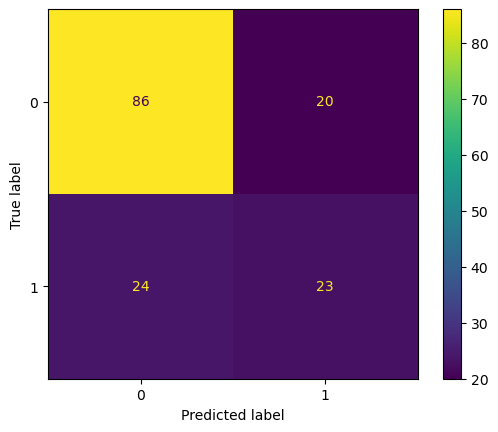

In [28]:
# Se puede visualizar la matriz de confusión
plot_confusion_matrix(modelo_knn, X_test, Y_test)  
plt.show()

Determinamos la exactitud que tiene el modelo.

In [29]:
print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(Y_train, y_pred_train))
print('Exactitud sobre test: %.2f' % accuracy_score(Y_test, y_pred_test))
print('Recall: %.2f' % recall_score(Y_test,y_pred_test))

Exactitud sobre entrenamiento: 0.84
Exactitud sobre test: 0.71
Recall: 0.49


In [30]:
# Mostrar reporte de clasificación sobre test
print(classification_report(Y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.78      0.81      0.80       106
           1       0.53      0.49      0.51        47

    accuracy                           0.71       153
   macro avg       0.66      0.65      0.65       153
weighted avg       0.71      0.71      0.71       153



In [31]:
# Mostrar reporte de clasificación sobre entrenamiento
print(classification_report(Y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88       391
           1       0.81      0.74      0.77       221

    accuracy                           0.84       612
   macro avg       0.84      0.82      0.83       612
weighted avg       0.84      0.84      0.84       612



Para mejorar la técnica KNN vamos a probar normalizando los datos

In [32]:
X_n = X.copy()
X_n=(X_n-X_n.min())/(X_n.max()-X_n.min())

In [33]:
X_n.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000
mean,0.226298,0.501715,0.492652,0.207896,0.094561,0.431708,0.185525,0.204357
std,0.198217,0.196551,0.123716,0.161082,0.136404,0.174235,0.144513,0.196039
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.361290,0.408163,0.000000,0.000000,0.375559,0.088058,0.050000
50%,0.176471,0.470968,0.489796,0.232323,0.037825,0.460507,0.144759,0.133333
75%,0.352941,0.625806,0.571429,0.323232,0.151300,0.535022,0.254296,0.333333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X_n, Y, test_size=0.2, random_state=0)
modelo_Knn = KNeighborsClassifier(n_neighbors=3) 
modelo_Knn = modelo_knn.fit(X_train, Y_train) 

In [35]:
y_pred_train = modelo_knn.predict(X_train)
y_pred_test = modelo_knn.predict(X_test)
print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(Y_train, y_pred_train))
print('Exactitud sobre test: %.2f' % accuracy_score(Y_test, y_pred_test))
print('Recall: %.2f' % recall_score(Y_test,y_pred_test))

Exactitud sobre entrenamiento: 0.85
Exactitud sobre test: 0.71
Recall: 0.45


In [36]:
# Mostrar reporte de clasificación sobre test
print(classification_report(Y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80       106
           1       0.54      0.45      0.49        47

    accuracy                           0.71       153
   macro avg       0.66      0.64      0.64       153
weighted avg       0.70      0.71      0.70       153



In [37]:
# Mostrar reporte de clasificación sobre entrenamiento
print(classification_report(Y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       391
           1       0.83      0.75      0.79       221

    accuracy                           0.85       612
   macro avg       0.85      0.83      0.84       612
weighted avg       0.85      0.85      0.85       612



### 4.1. Construcción del modelo con búsqueda de hiperparámetros


In [38]:
# Primero definamos el espacio de búsqueda
n_vecinos =  list(range(1,11))
# Fijemos el número de particiones. Utilizaremos K = 10.
particiones = KFold(n_splits=10, shuffle=True, random_state = 0)

In [39]:
param_grid = {'n_neighbors': n_vecinos, 'p': [1, 2]}

In [40]:
clasificadorKNN = KNeighborsClassifier()
modelo_Knn = GridSearchCV(clasificadorKNN, param_grid, scoring = 'recall', cv=particiones)
modelo_Knn.fit(X_train,Y_train) 
print("Mejor parámetro: {}".format(modelo_Knn.best_params_)) 
print("Mejor cross-validation score: {:.2f}".format(modelo_Knn.best_score_))

Mejor parámetro: {'n_neighbors': 5, 'p': 2}
Mejor cross-validation score: 0.55


In [41]:
# Obtener el mejor modelo.
modelo_final = modelo_Knn.best_estimator_
# Probemos ahora este modelo sobre test.
y_pred_train = modelo_final.predict(X_train)
y_pred_test = modelo_final.predict(X_test)
print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(Y_train, y_pred_train))
print('Exactitud sobre test: %.2f' % accuracy_score(Y_test, y_pred_test))
print('Recall: %.2f' % recall_score(Y_test,y_pred_test))

Exactitud sobre entrenamiento: 0.82
Exactitud sobre test: 0.74
Recall: 0.49


In [42]:
# Mostrar reporte de clasificación sobre test
print(classification_report(Y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       106
           1       0.59      0.49      0.53        47

    accuracy                           0.74       153
   macro avg       0.69      0.67      0.68       153
weighted avg       0.73      0.74      0.73       153



In [43]:
# Mostrar reporte de clasificación sobre entrenamiento
print(classification_report(Y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       391
           1       0.79      0.67      0.72       221

    accuracy                           0.82       612
   macro avg       0.81      0.78      0.79       612
weighted avg       0.82      0.82      0.81       612



### 4.2. Predicciones y probabilidad

Una vez obtenido el modelo de árbol de decisión vamos a obtener la probabilidad de que un dato sea clasificado como de una clase particular, si este tiene diabetes o no. 

In [44]:
# Por ejemplo, tomemos un dato del conjunto de test y apliquemos el método "predict_proba".
y_pred_test = modelo_final.predict_proba(X_test.iloc[[105]])

In [45]:
print(y_pred_test)

[[0.8 0.2]]


In [46]:
# Para saber el orden de las clases puedes utilizar el atributo "classes_" del modelo:
modelo_final.classes_

array([0, 1])

Como podemos observar cuando creamos la variable clase, el conjunto de datos está balanceado.